In [1]:
# method for detecting relevant peaks of a signal with low freq noise
# data from noisy ECG

import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import signal
from scipy.signal import find_peaks
import librosa

In [2]:
# import using librosa
filename = 'Henderson2.wav'
y, sr = librosa.load(filename)
print(f"sample rate: {sr} Hz")

sample rate: 22050 Hz


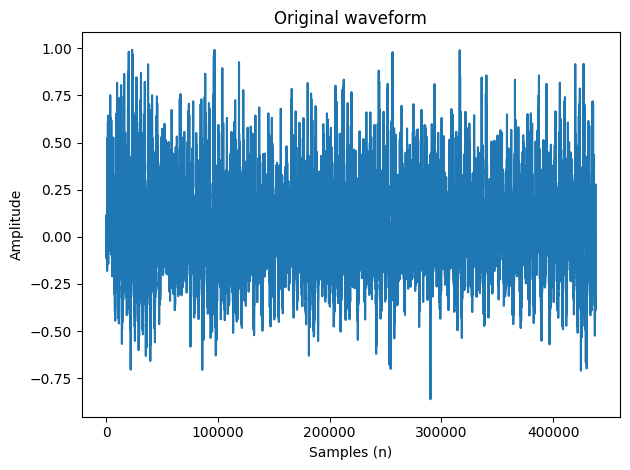

In [3]:
# plot original waveform
plt.plot(y)
plt.title('Original waveform')
plt.xlabel('Samples (n)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

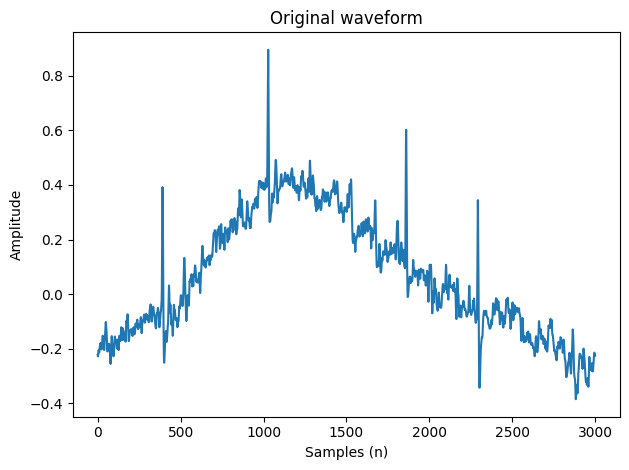

In [4]:
# plot original waveform zoomed
plt.plot(y[103000:106000])
plt.title('Original waveform')
#plt.axis([103000, 106000, -1.2, 1.2])
plt.xlabel('Samples (n)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'probability')

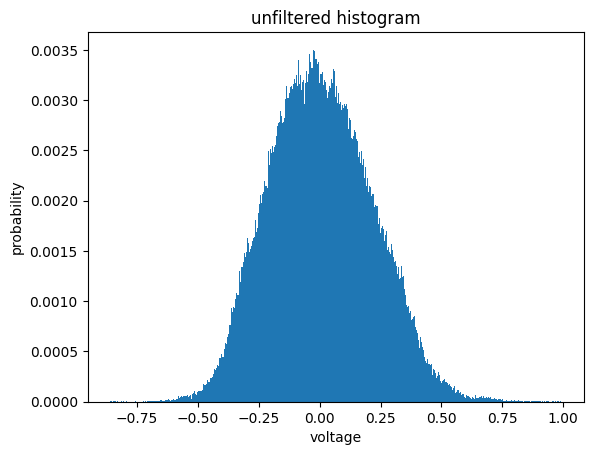

In [5]:
# unfiltered amplitude histogram
hist = plt.hist(y,bins=1000,weights=np.ones(len(y)) / len(y))
plt.figure(1,1)
plt.title('unfiltered histogram')
plt.xlabel('voltage')
plt.ylabel('probability')

Text(0.5, 0, 'Frequency (Hz)')

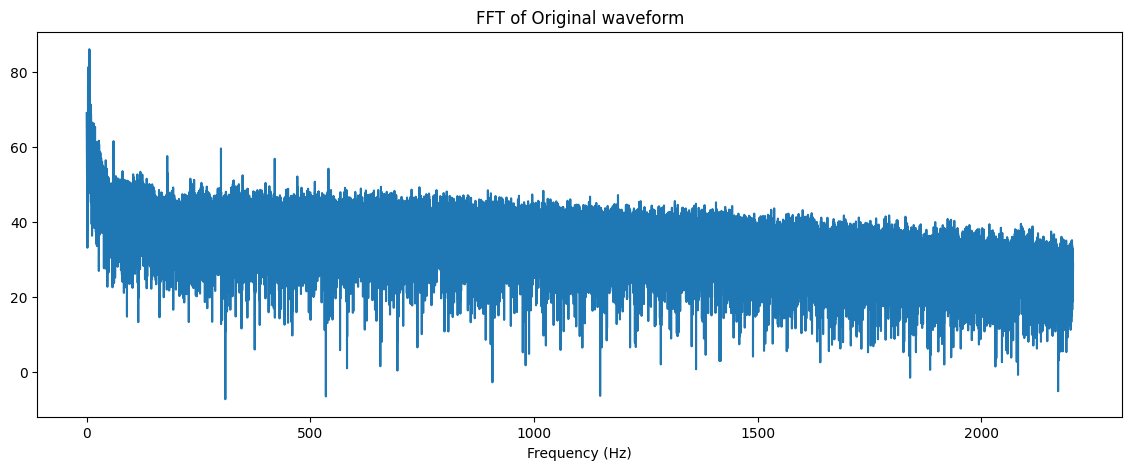

In [6]:
# plot fft of original waveform
N = len(y)
Y = scipy.fft.fft(y[:N])
Y_mag = np.absolute(Y)        # spectral magnitude
f = np.linspace(0, sr, N)     # frequency variable
plt.figure(figsize=(14, 5))
plt.title('FFT of Original waveform')
plt.plot(f[:int(N/10)], 20*np.log10(Y_mag[:int(N/10)])) # magnitude spectrum
plt.xlabel('Frequency (Hz)')
#plt.vlines(30,0,80,colors='r',label='30Hz')
#plt.legend()

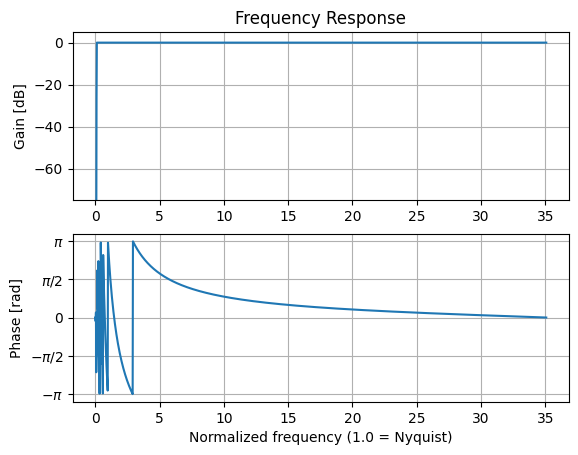

In [7]:
# design high pass filter to reduce low freq noise
f0 = 30                 # cutoff freq in Hz
#w0 = 2*np.pi*(f0/sr)    # cutoff freq in rad/sample

# design butterworth filter
taps = 151          # filter order
wn = 2 * f0 / sr    # normalized cutoff
sos = signal.butter(taps, wn, 'hp', analog=False, output='sos')

# get frequency response of filter
w, h = signal.sosfreqz(sos, worN=1500, fs=sr)

# plot filter freq response
plt.subplot(2, 1, 1)
db = 20*np.log10(np.maximum(np.abs(h), 1e-5))
plotlen = w/np.pi/100
plt.plot(plotlen, db)
plt.ylim(-75, 5)
plt.grid(True)
plt.yticks([0, -20, -40, -60])
plt.ylabel('Gain [dB]')
plt.title('Frequency Response')
plt.subplot(2, 1, 2)
plt.plot(plotlen, np.angle(h))
plt.grid(True)
plt.yticks([-np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi],
           [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
plt.ylabel('Phase [rad]')
plt.xlabel('Normalized frequency (1.0 = Nyquist)')
plt.show()

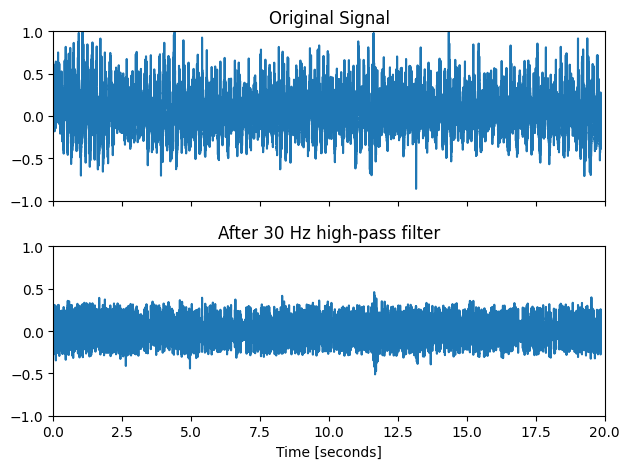

In [8]:
# compare original signal to filtered signal
# filter signal
filtered = signal.sosfilt(sos, y)

# set up time series dimension
t = np.linspace(0,len(y)/sr,len(y))
# setup fig
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# plot original signal
ax1.plot(t, y)
ax1.set_title('Original Signal')
ax1.axis([0, 1, -1.0, 1.0])

# plot filtered signal
ax2.plot(t, filtered)
ax2.set_title('After {} Hz high-pass filter'.format(f0))
ax2.axis([0, 20, -1, 1])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

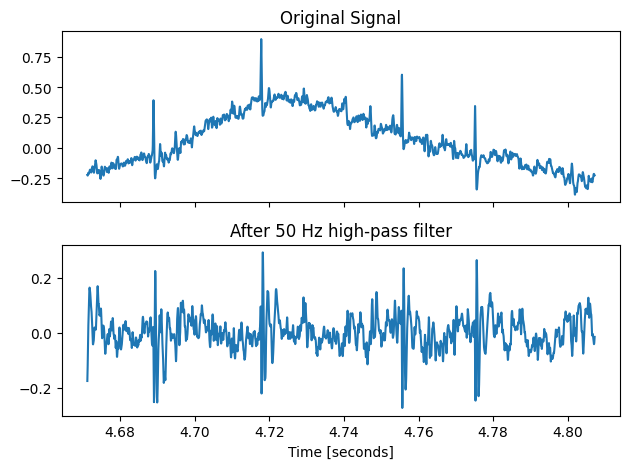

In [9]:
# above plot zoomed in
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t[103000:106000], y[103000:106000])
ax1.set_title('Original Signal')
#ax1.axis([0, 1, -1, 1])

ax2.plot(t[103000:106000], filtered[103000:106000])
ax2.set_title('After 50 Hz high-pass filter')
#ax2.axis([0, 0.6, -.5, .5])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Magnitude (dB)')

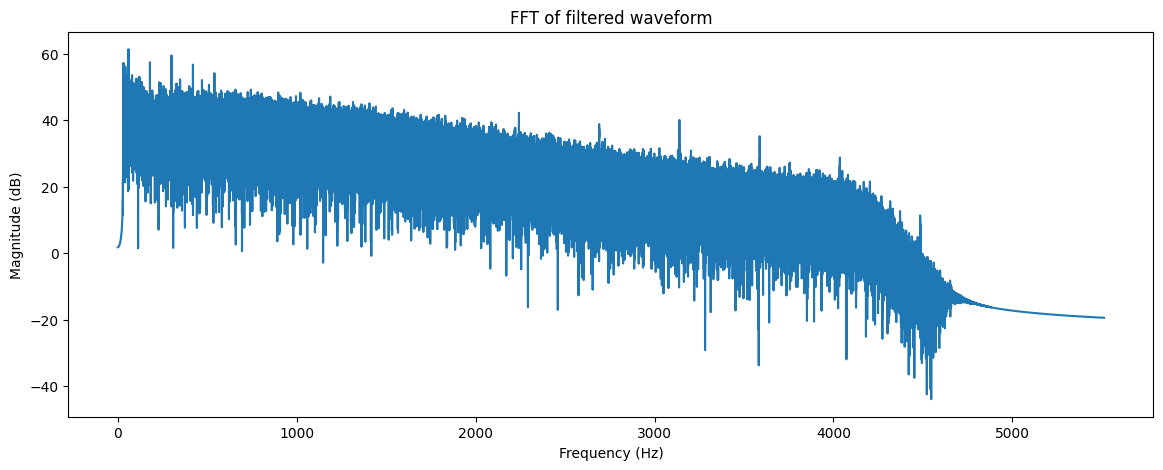

In [10]:
# plot fft of filtered signal
N = len(y)
Yf = scipy.fft.fft(filtered[:N])
Yf_mag = np.absolute(Yf)        # spectral magnitude
f = np.linspace(0, sr, N)     # frequency variable
plt.figure(figsize=(14, 5))
plt.title('FFT of filtered waveform')
plt.plot(f[:int(N/4)], 20*np.log10(Yf_mag[:int(N/4)])) # magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
#plt.vlines(30,0,60,colors='r',label='filter cutoff = 30Hz')
#plt.legend()

Text(0, 0.5, 'probability')

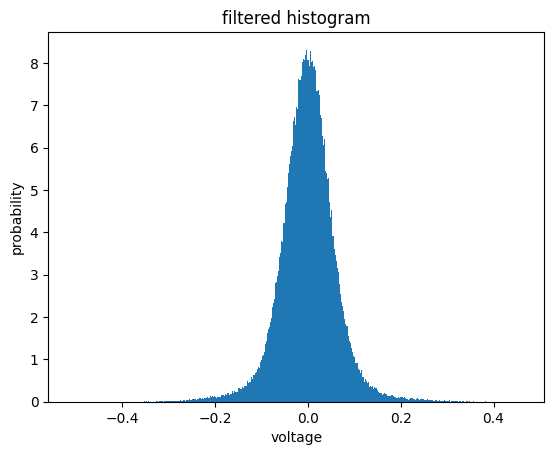

In [11]:
# histogram of filtered amplitude
hist_filt = plt.hist(filtered,bins=1000,density=True,stacked=True)

plt.figure(1,1)
plt.title('filtered histogram')
plt.xlabel('voltage')
plt.ylabel('probability')

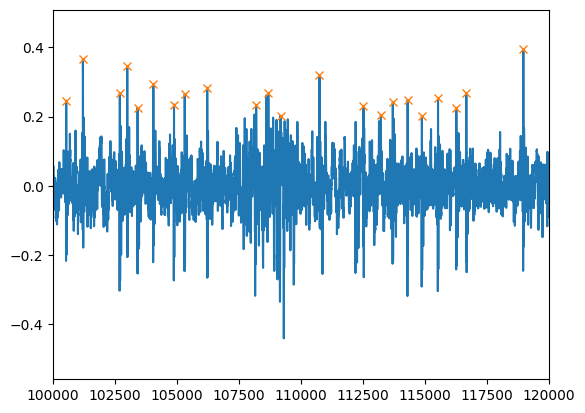

In [12]:
# choose amplitude cutoff from histogram
# and design peak detection algorithm
ampCutoff = 0.2
peaks, _ = find_peaks(filtered, height=ampCutoff, distance=250)

# plot peaks
plt.plot(filtered)
plt.plot(peaks, filtered[peaks], "x")
plt.xlim([100000,120000])
plt.show()